# Diabetes dataset visualization and preprocesing

In [1]:
# Visualize diabetes dataset
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load dataset

In [5]:
# load data
diabetes = pd.read_csv('../dataset/test_pima.csv')

## Show dataset info

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BloodPressure    392 non-null    int64  
 1   Insulin          392 non-null    int64  
 2   BMI              392 non-null    float64
 3   Fasting Glucose  392 non-null    float64
 4   Age              392 non-null    int64  
 5   Outcome          392 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.5 KB


In [ ]:
# diabetes.explode(['Age', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'],)

In [3]:
# Calc mean and std for each feature
diabetes.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Outcome
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [5]:
diabetes.describe().to_csv('../dataset/diabetes-15k_Preg_describe.csv')

Histogram of attributes

In [ ]:
# Plot all histograms
sns.set(style="whitegrid")
sns.pairplot(diabetes, hue="Outcome")

In [ ]:
# Boxplot for each feature to check outliers
for col in diabetes.columns:
    diabetes[col].plot.box()
    # show name
    plt.title(col)
    # show Y label
    plt.ylabel('Value')
    plt.show()

In [3]:
original_size = diabetes.shape[0]
# Remove outliers and extreme values
for col in diabetes.columns:
    # Calc std and mean
    std = diabetes[col].std()
    mean = diabetes[col].mean()
    cut_off = 3 * std
    # Remove outliers
    diabetes[col] = diabetes[col].apply(lambda x: x if (x > mean - cut_off) & (x < mean + cut_off) else None)

print(diabetes.isnull().sum())
print("Num of outliers: "+ str(original_size - diabetes.dropna().shape[0]))

DiastolicBloodPressure      0
SerumInsulin              335
BMI                         0
Fasting Glucose             0
Age                       218
Outcome                     0
dtype: int64
Num of outliers: 548


In [7]:
diabetes = diabetes.dropna()

In [5]:
# Feature selection with RFE
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

print(diabetes.Outcome)

estimator = SVR()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(diabetes.drop('Outcome', axis=1), diabetes.Outcome)
print(selector.support_)
print(selector.ranking_)



0        0
1        0
2        0
3        1
4        0
        ..
14995    1
14996    1
14997    0
14998    0
14999    1
Name: Outcome, Length: 15000, dtype: int64


ValueError: when `importance_getter=='auto'`, the underlying estimator SVR should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [ ]:
diabetes_selected = diabetes.copy()
print(selector.feature_names_in_)
print(selector.ranking_)
print(selector.support_)
for i in range(len(selector.support_)):
    if selector.support_[i] == False:
        diabetes_selected = diabetes_selected.drop(selector.feature_names_in_[i], axis=1)
print(diabetes_selected.columns)

In [ ]:
# Calculate correlation coefficient between each pair of variables
corr = diabetes.corr(method='pearson')
print(corr)
# Plot correlation matrix
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
# Select attributes has correlation coefficient greater than 0.2
corr_var = corr[abs(corr) > 0.1]
print(corr_var.Diabetes)
dropped_features = (corr.Outcome.where(corr.Diabetes <= 0.1).dropna().index.tolist())
print(dropped_features)

In [ ]:
diabetes = diabetes.drop(columns=dropped_features, axis=1, inplace=False)
print(diabetes.shape)

In [8]:
# Normalize data to 0-1 range
diabetes_norm = diabetes.copy()
for col in diabetes_norm.columns:
    if col == 'Outcome':
        continue
    diabetes_norm[col] = diabetes_norm[col].apply(lambda x: (x - diabetes_norm[col].min()) / (diabetes_norm[col].max() - diabetes_norm[col].min()))

In [10]:
# Normalize diabetes selected data
diabetes_selected_norm = diabetes_selected.copy()
for col in diabetes_selected_norm.columns:
    if col == 'Outcome':
        continue
    diabetes_selected_norm[col] = diabetes_selected_norm[col].apply(lambda x: (x - diabetes_selected_norm[col].min()) / (diabetes_selected_norm[col].max() - diabetes_selected_norm[col].min()))
    # Save norm to file as numpy array
    diabetes_selected_norm.to_csv('./PIMA_15k_FG_norm.csv', index=False)

NameError: name 'diabetes_selected' is not defined

In [ ]:
# Mean and std after normalize
diabetes_norm.describe()

In [12]:
diabetes_norm = diabetes_norm.drop(columns=['TricepsThickness','DiabetesPedigree'], axis=1, inplace=False)

In [9]:
# Write normalized data to csv
diabetes_norm.to_csv('../dataset/PIMA_15K_FG_Preg_norm.csv', index=False)
# diabetes_selected_norm.to_csv('../dataset/diabetes_dw_filled_selected_norm.csv', index=False)

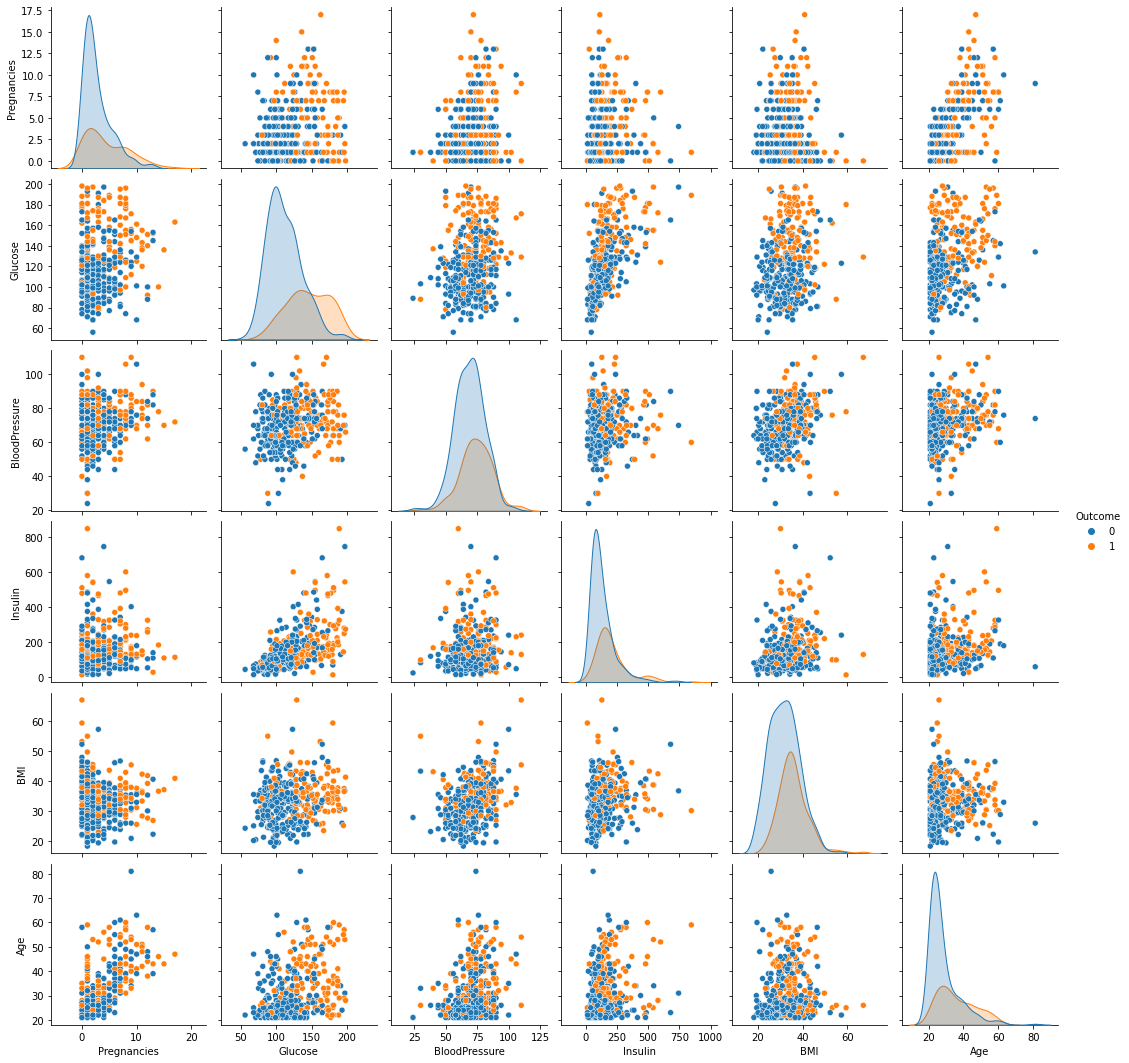

In [6]:
# Plot cross scatter plot
sns.pairplot(diabetes, hue='Outcome')
plt.show()